### Contents
- [**Importing Libraries**](#Import-Libraries)
- [**Preprocessing the Data**](#Data-Pre-Processing)
- [**Checking Data Distribution**](#Data-Distribution)
- [**Stemming**](#Stemming)
- [**Creating N-grams**](#Creating-N-grams)
- [**Creating Vectors from Words**](#Creating-Vectors-from-Words)
- [**CBOW and SkipGram**](#CBOW-and-SkipGram)

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

## Data Pre-Processing

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train2.csv')

C:\Users\shubh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,5,6,7,9,27,28,29,30,31,32,33,34,40,41,42,43,44,45,46,47,48,49,55,56,57,58,59,60,61,62,64,70,71,72,73,74,75,76,79,85,86,87,88,89,90,91,93,94,100,101,102,103,104,105,106,107,108,109,115,116,117,118,119,120,121,123,124,130) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
test.head()

,Column 2,Label,Statement,Statement1
0,0,TRUE,Building a wall on the U.S.-Mexico border will...,"Meantime, engineering experts agree the wall w..."
1,1,FALSE,Wisconsin is on pace to double the number of l...,She cited layoff notices received by the state...
2,2,FALSE,Says John McCain has done nothing to help the ...,"Trump said that McCain ""has done nothing to he..."
3,3,half-true,Suzanne Bonamici supports a plan that will cut...,"But spending still goes up. In addition, many ..."
4,4,pants-fire,When asked by a reporter whether hes at the ce...,Our rating A Democratic Party web video making...


In [5]:
train.head()

,Column 2,Label,Statement,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130
0,0,FALSE,Says the Annies List political group supports ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,half-true,When did the decline of coal start? It started...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,mostly-true,"""Hillary Clinton agrees with John McCain """"by ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,half-true,"However, it took $19.5 million in Oregon Lotte...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,mostly-true,Says GOP primary opponents Glenn Grothman and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Shape of each set
print("Shape of TRAIN DATA: ", train.shape)
print("Shape of TEST DATA: ", test.shape)

Shape of TRAIN DATA:  (5012, 131)
Shape of TEST DATA:  (1267, 4)


In [7]:
train.describe(), test.describe()

(           Column 2  Unnamed: 8  Unnamed: 20  Unnamed: 21  Unnamed: 22  \
 count   5012.000000    7.000000     6.000000     6.000000     6.000000   
 mean    5032.917598   27.857143    10.666667     9.500000     8.333333   
 std     2971.190640   60.028961    14.165686    12.340989     8.891944   
 min        0.000000    0.000000     0.000000     1.000000     1.000000   
 25%     2480.750000    0.500000     1.000000     1.250000     1.000000   
 50%     4922.500000    1.000000     4.500000     5.000000     5.500000   
 75%     7667.250000   15.000000    15.500000    11.000000    13.750000   
 max    10239.000000  163.000000    36.000000    33.000000    22.000000   
 
        Unnamed: 23  Unnamed: 24  Unnamed: 35  Unnamed: 36  Unnamed: 37  ...  \
 count     6.000000     6.000000     4.000000     4.000000     4.000000  ...   
 mean     11.666667     2.333333     1.750000     1.500000     1.500000  ...   
 std      15.895492     3.386247     0.957427     1.914854     1.914854  ...   
 mi

## Data Distribution

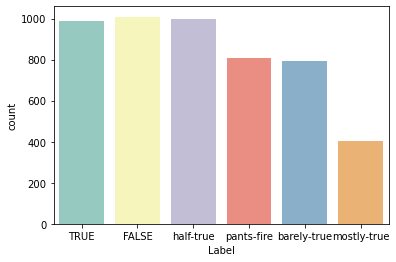

In [8]:
# Distribution of classes for prediction
def Class_Distr(datafile):
    return sb.countplot(x='Label', data= datafile, palette='Set3')

# Even Distribution of data between Train and Test dataset
Class_Distr(train)
Class_Distr(test)


In [9]:
# Saving the original Data for future
train_orig = train.copy()
test_orig = test.copy()

## Stemming

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language

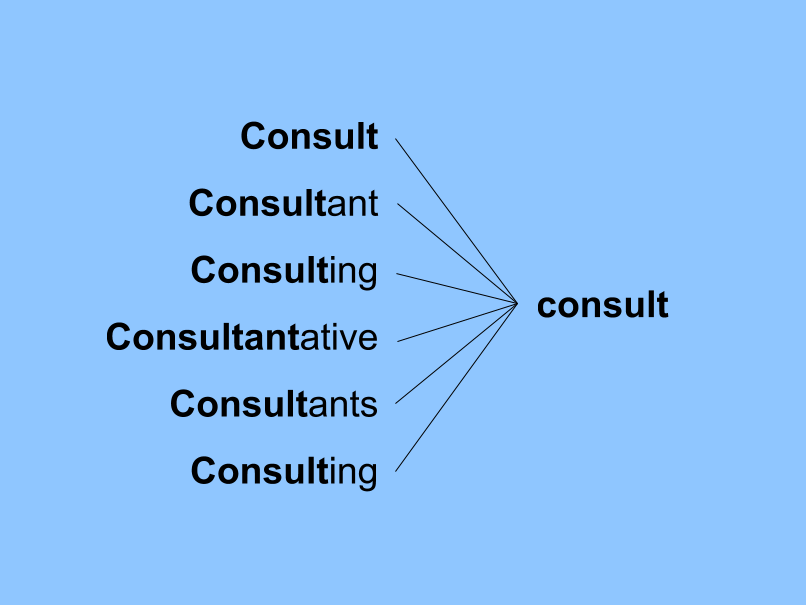

In [10]:
from IPython.display import Image
Image("Stemming example.png")

In [11]:
def stemming(str_tokens, str_stemmer):
    stemmed_str = []
    for token_i in str_token:
        stemmed.append(str_stemmer.stem(token_i))
    return stemmed

In [12]:
# Data process
def data_process(data, exclude_stopword = True, stem = True):
    str_tokens = [w.lower() for w in data]
    stemmed_tokens = str_tokens
    stemmed_tokens = stemming(str_tokens, eng_stemmer)
    stemmed_tokens = [w for w in stemmed_tokens if w not in stopwords ]
    return tokens_stemmed

## Creating N-grams

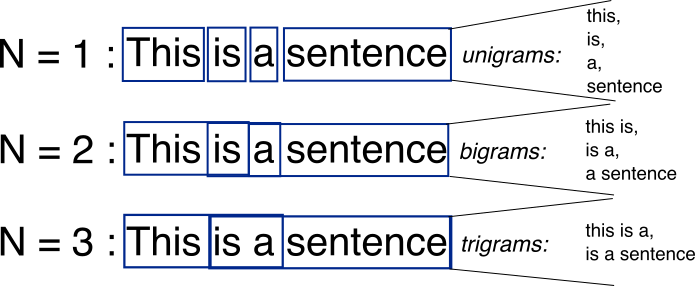

In [13]:
Image("ngrams.png")

In [14]:
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

In [15]:
#bigram
def create_bigrams(words):
    assert type(words) == list
    gap = 0
    joinned_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,gap+2):
                if i+k < Len:
                    lst.append(joinned_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

In [16]:
# Trigram creation

def create_trigrams(words):
    assert type(words) == list
    gap == 0
    joinned_str = " "
    Len = len(words)
    if L > 2:
        lst = []
        for i in range(1,gap+2):
            for k1 in range(1, gap+2):
                for k2 in range(1,gap+2):
                    if i+k1 < Len and i+k1+k2 < Len:
                        lst.append(joinned_str.join([words[i], words[i+k1],words[i+k1+k2]]))
        else:
            #set is as bigram
            lst = create_bigram(words)
    return lst

In [17]:
porter = PorterStemmer()

In [18]:
def porter_tokenizer(statement):
    return [porter.stem(word) for word in statement.split()]

## Creating Vectors from Words

Using large amounts of unannotated plain text, word2vec learns relationships between words automatically. The output are vectors, one vector per word, with remarkable linear relationships that allow us to do things like:

vec(“king”) - vec(“man”) + vec(“woman”) => vec(“queen”)

The result is a set of word-vectors where vectors close together in vector space have similar meanings based on context, and word-vectors distant to each other have differing meanings. 

For example, strong and powerful would be close together and strong and Paris would be relatively far.


In [19]:
! pip install gensim

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\s

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\U

True

## CBOW and SkipGram

In training a Word2Vec model, there are 2 architectures:

1. CBOW (Continuous Bag of words) <br>
The CBOW model learns to predict a target word leveraging all words in its neighborhood. The sum of the context vectors are used to predict the target word. The neighboring words taken into consideration is determined by a pre-defined window size surrounding the target word.

2. SkipGram <br>
The SkipGram model on the other hand, learns to predict a word based on a neighboring word. To put it simply, given a word, it learns to predict another word in it’s context.

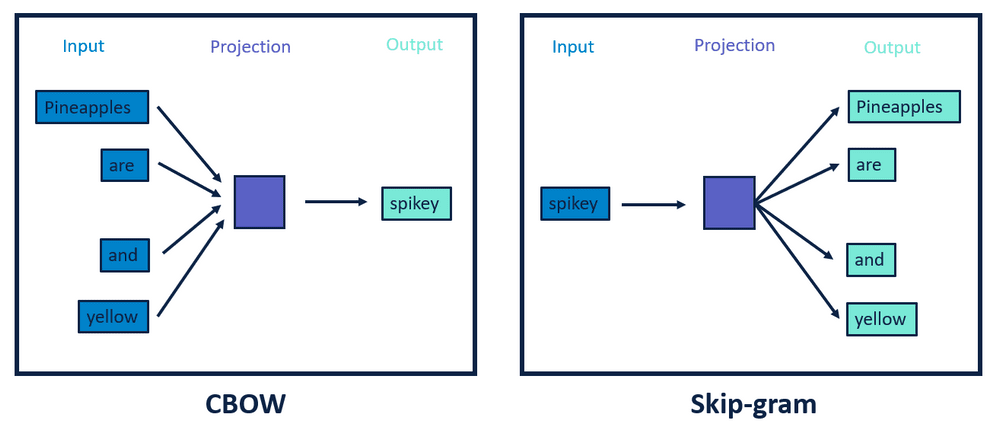

In [21]:
Image("cbowskipgram.png")

In [22]:
# creating word matrix  with bag of word technique
countV = CountVectorizer()
train_count = countV.fit_transform(train['Statement'].values)

def countVectorizer_matrix():
    
    #vocab size
    train_count.shape

    #check vocabulary 
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])
    
countVectorizer_matrix()

{'says': 6937, 'the': 7856, 'annies': 725, 'list': 4756, 'political': 5981, 'group': 3660, 'supports': 7660, 'third': 7885, 'trimester': 8078, 'abortions': 425, 'on': 5529, 'demand': 2350, 'when': 8544, 'did': 2465, 'decline': 2274, 'of': 5492, 'coal': 1762, 'start': 7455, 'it': 4335, 'started': 7456, 'natural': 5314, 'gas': 3479, 'took': 7962, 'off': 5493, 'that': 7852, 'to': 7939, 'begin': 1075, 'in': 4078, 'president': 6108, 'george': 3516, 'bushs': 1380, 'administration': 520, 'hillary': 3861, 'clinton': 1741, 'agrees': 601, 'with': 8606, 'john': 4391, 'mccain': 4993, 'by': 1400, 'voting': 8409, 'give': 3542, 'bush': 1379, 'benefit': 1102, 'doubt': 2617, 'iran': 4297, 'however': 3964, '19': 81, 'million': 5118, 'oregon': 5579, 'lottery': 4819, 'funds': 3441, 'for': 3333, 'port': 6009, 'newport': 5371, 'eventually': 2961, 'land': 4571, 'new': 5366, 'noaa': 5392, 'marine': 4933, 'operations': 5547, 'center': 1557, 'pacific': 5688, 'gop': 3581, 'primary': 6133, 'opponents': 5553, 'gle

## TFIDF

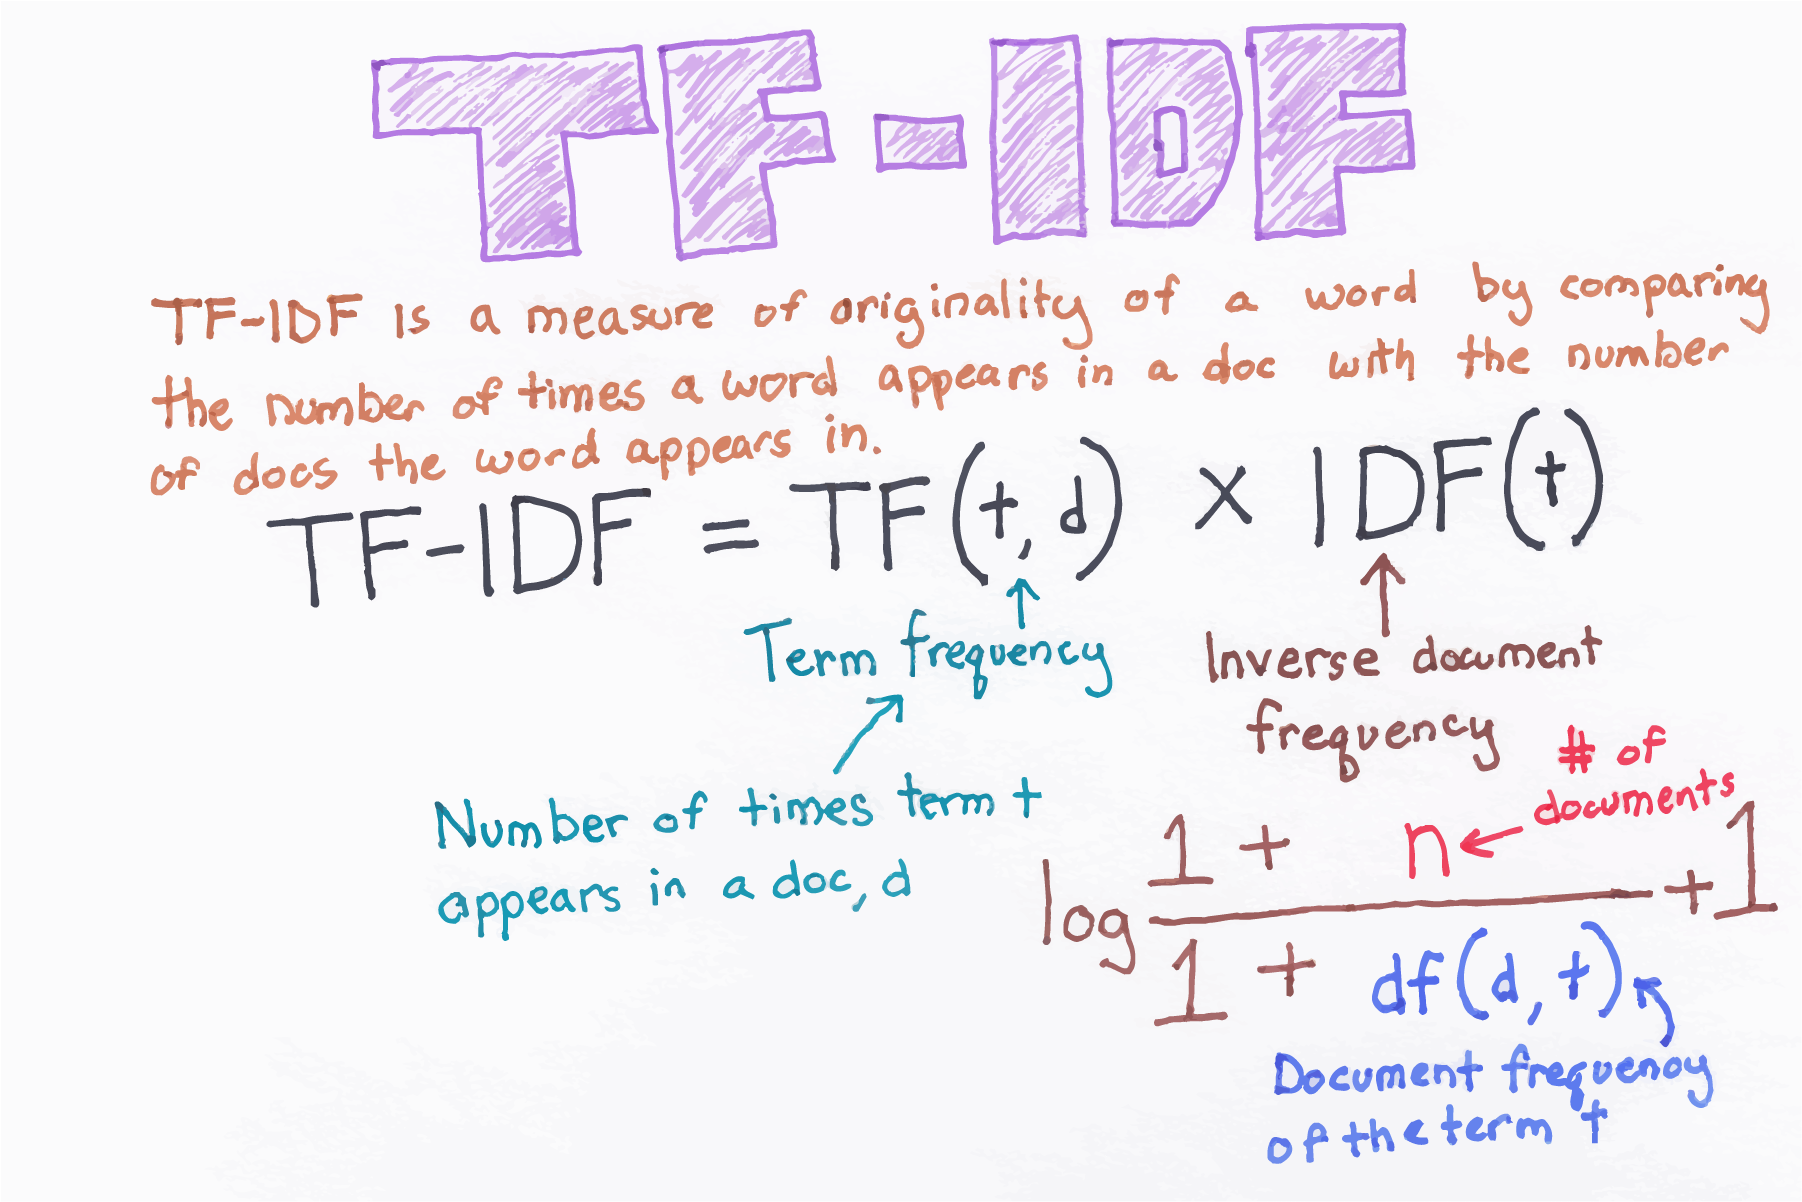

In [23]:
Image('tfidf.png')

In [24]:
# create tfidf features 
tfidfV = TfidfTransformer()

train_tfidf = tfidfV.fit_transform(train_count)

In [25]:
def tfidf_matrix():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])

tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf = True,smooth_idf = True)

## POS Tagging

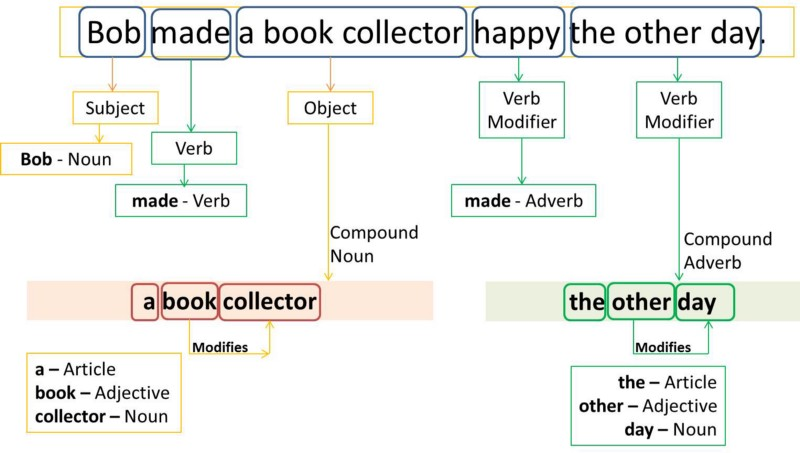

In [26]:
Image('pos.jpeg')

In [27]:
# Tags
nltk.download('averaged_perceptron_tagger')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = train['Statement']
 
print(training_sentences)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0       Says the Annies List political group supports ...
1       When did the decline of coal start? It started...
2       "Hillary Clinton agrees with John McCain ""by ...
3       However, it took $19.5 million in Oregon Lotte...
4       Says GOP primary opponents Glenn Grothman and ...
                              ...                        
5007    There are a larger number of shark attacks in ...
5008    Democrats have now become the party of the [At...
5009    Says an alternative to Social Security that op...
5010    On lifting the U.S. Cuban embargo and allowing...
5011    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 5012, dtype: object


In [28]:
# Applying Word2vec

with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
        for line in lines}

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

## Classification

Six-Way Classification

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve,  GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

## Random Forest Classification Algorithm

A random forest is an ensemble classifier that estimates based on the combination of different decision trees. Effectively, it fits a number of decision tree classifiers on various subsamples of the dataset. Also, each tree in the forest built on a random best subset of features.

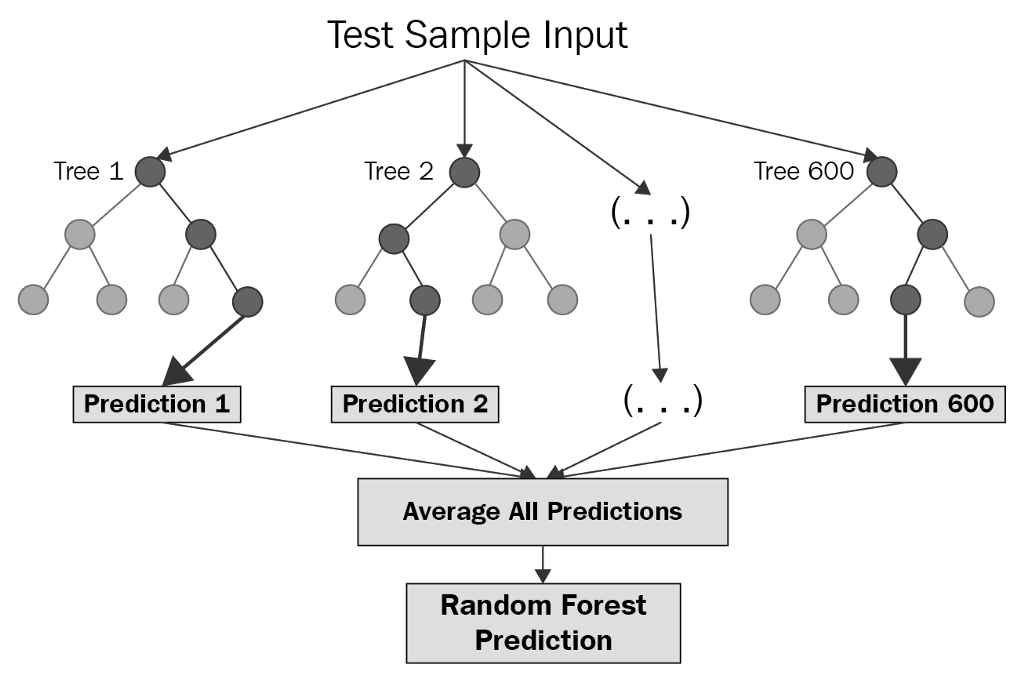

In [30]:
Image("randomforest.png")

In [31]:
#Random Forest
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=350,n_jobs=3))
        ])
print("Accuracy: ")    
random_forest.fit(train['Statement'],train['Label'])
predicted_rf = random_forest.predict(test['Statement'])
np.mean(predicted_rf == test['Label'])

Accuracy: 


0.2580899763220205

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [33]:
! pip install -U Scikit-learn

Requirement already up-to-date: Scikit-learn in c:\users\shubh\anaconda3\lib\site-packages (0.24.1)


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Confusion Matrix ==> \n\n", confusion_matrix(test['Label'], predicted_rf))
print("\n\n Accuracy Score: ", accuracy_score(test['Label'], predicted_rf)*100)
print("\n____________________________________________________________________\n")
print("Classification Report of Random Forest: \n\n", classification_report(test['Label'], predicted_rf))

Confusion Matrix ==> 

 [[126  16  16  35  55   1]
 [ 67  29   6  29  77   0]
 [ 87  10  23  35  57   0]
 [106  15  15  61  68   0]
 [ 70  24  10  50  86   1]
 [ 45   5   6  20  14   2]]


 Accuracy Score:  25.80899763220205

____________________________________________________________________

Classification Report of Random Forest: 

               precision    recall  f1-score   support

       FALSE       0.25      0.51      0.34       249
        TRUE       0.29      0.14      0.19       208
 barely-true       0.30      0.11      0.16       212
   half-true       0.27      0.23      0.25       265
 mostly-true       0.24      0.36      0.29       241
  pants-fire       0.50      0.02      0.04        92

    accuracy                           0.26      1267
   macro avg       0.31      0.23      0.21      1267
weighted avg       0.29      0.26      0.23      1267



* ## Prediction Test of a Model...

In [35]:
import pickle

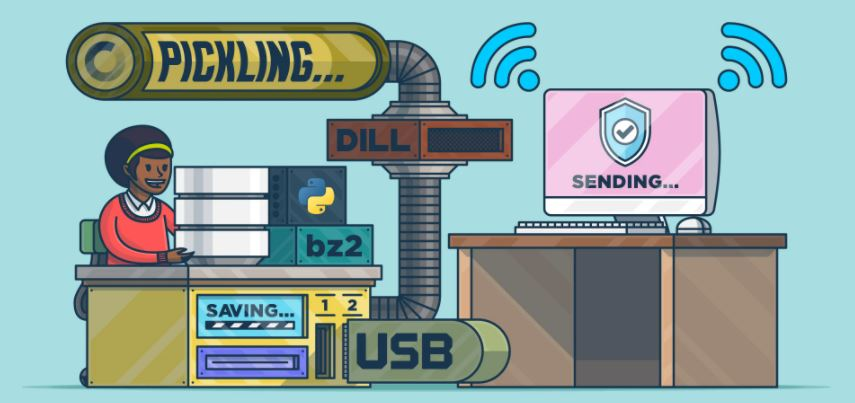

In [40]:
Image("pickling.jpg")

In [37]:
Saved_model = 'Model.sav'
pickle.dump(random_forest,open(Saved_model,'wb'))

In [38]:
var = input("Enter the news text you want to test or verify: ")
print("Your Entry: " + str(var))

# Here we go with the prediction:
def detecting_fake_news(var):    
    load_model = pickle.load(open('Model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("Folowing Statement predicted as:  ",prediction[0]),
        print("The probability score will be:  ",prob[0][1]))
  
if __name__ == '__main__':
    detecting_fake_news(var)

Enter the news text you want to test or verify: India
Your Entry: India
Folowing Statement predicted as:   FALSE
The probability score will be:   0.39071428571428574
